# Loading The Dataset

In [1]:
import kagglehub
path = kagglehub.dataset_download("vishakhdapat/imdb-movie-reviews")

Using Colab cache for faster access to the 'imdb-movie-reviews' dataset.


In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv(f"{path}/IMDB Dataset.csv")

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# Initial Data Exploration

In [5]:
df.review[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [6]:
df.sentiment.value_counts()

,count
sentiment,
positive,25000
negative,25000


In [7]:
df.isnull().sum()

,0
review,0
sentiment,0


In [8]:
df.duplicated().sum()

np.int64(418)

# Text Preprocessing

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
import re
from nltk.corpus import stopwords

def remove_htmltags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

def lowercasing(raw_text):
    cleaned_text = raw_text.lower()
    return cleaned_text

def remove_stopwords(raw_text):
    exclude = stopwords.words('english')
    new_text = []
    for word in raw_text.split():
        if word in exclude:
            new_text.append('')
        else:
            new_text.append(word)
    cleaned_text = "".join(new_text)
    return cleaned_text

In [11]:
# Removing Duplicate Values
df = df.drop_duplicates()

In [12]:
# Removing HTML Tags
df.loc[:, 'review'] = df['review'].apply(remove_htmltags)

In [13]:
# Lowercasing
df.loc[:, 'review'] = df['review'].apply(lowercasing)

In [14]:
# Removing Stopwords
df.loc[:, 'review'] = df['review'].apply(remove_stopwords)

# Encoding Target Column

In [15]:
x = df.drop(columns=['sentiment'])
y = df['sentiment']

In [16]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)

In [17]:
y

array([1, 1, 1, ..., 0, 0, 0])

# Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Text Vectorization

In [19]:
# Applying BoW
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=3000)

x_train_vec = vectorizer.fit_transform(x_train['review']).toarray()
x_test_vec = vectorizer.transform(x_test['review']).toarray()

# Naive Bayes Model

In [20]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(x_train_vec, y_train)

GaussianNB()

In [21]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.6723807603105778

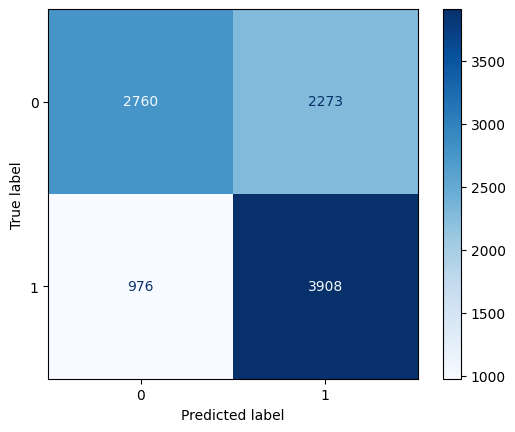

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# LinearSVC Model

In [23]:
from sklearn.svm import LinearSVC

model = LinearSVC()

model.fit(x_train_vec, y_train)

LinearSVC()

In [24]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.6934556821619441

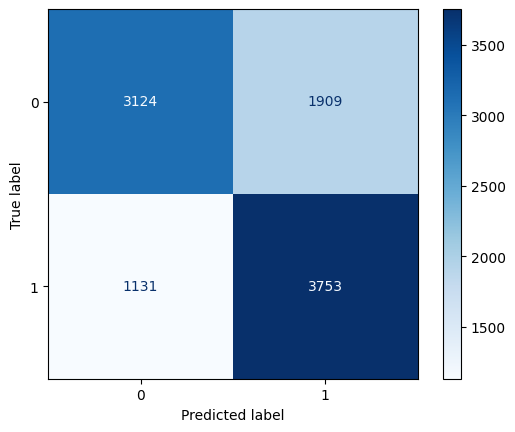

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()

# Logistic Regression Model

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(x_train_vec, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test_vec)

accuracy_score(y_test, y_pred)

0.6943632146818595

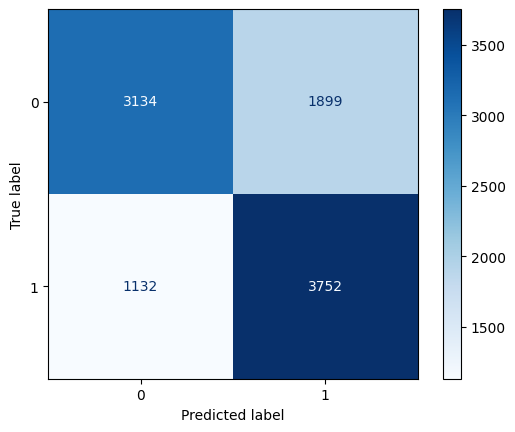

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()